# 📌Loading Required Packages

In [1]:
#Important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 📌Check Out the Data

In [2]:
#Load Dataset
data = pd.read_csv("03_Clustering_Marketing.csv")

In [3]:
#Running head command to see first 6 observations
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# 📌Summary Statistics of Numerical Variables

In [4]:
data.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


# 📌Treating Missing Values

In [5]:
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

**A total of 2496 records have missing ages. Also concerning is the fact that the minimum and maximum values seem to be unreasonable; it is unlikely that a 3 year old or a 106 year old is attending high school.**

# 📌Let's have a look at the number of male, female and missing values

In [6]:
data['gender'].value_counts(dropna = False) #display NaN values also

F      11057
M       2606
NaN     1337
Name: gender, dtype: int64

**There are 11057 female, 2606 male teen students and 1337 missing values**

# 📌Now fill all the null values in gender column with “Not disclosed”

In [7]:
data['gender'].fillna('not disclosed', inplace = True)


In [8]:
data['gender'].isnull().sum()

0

In [9]:
data['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

# 📌One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [10]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [11]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

# 📌Now fill the missing values for each graduation year with the mean that we got as above

In [12]:
data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [13]:
data['age'].isnull().sum()

0

**From the above summary we can see that there are no missing values in the dataset**

# 📌Treating Outliers

**The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind.

**Let's detect the outliers using a box plot below**

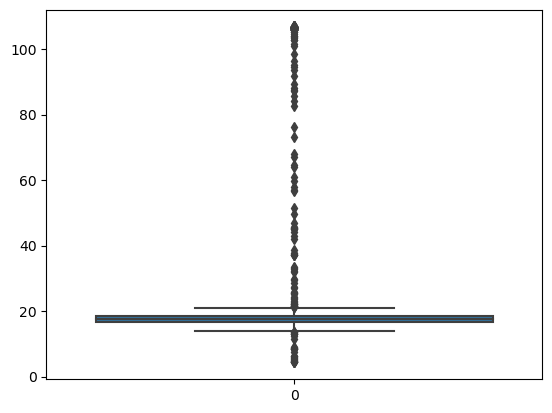

In [14]:
sns.boxplot(data['age'])
plt.show()

In [15]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1
print(iqr)

1.855134201954396


In [16]:
df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In [17]:
df['age'].describe()

count    14824.000000
mean        17.392977
std          1.134571
min         13.843000
25%         16.539000
50%         17.446000
75%         18.400134
max         21.065000
Name: age, dtype: float64

**From the above summary we can observe that after treating the outliers the mininmum age is 13.843000 and the maximum age is 21.065000**

In [18]:
df.shape

(14824, 40)

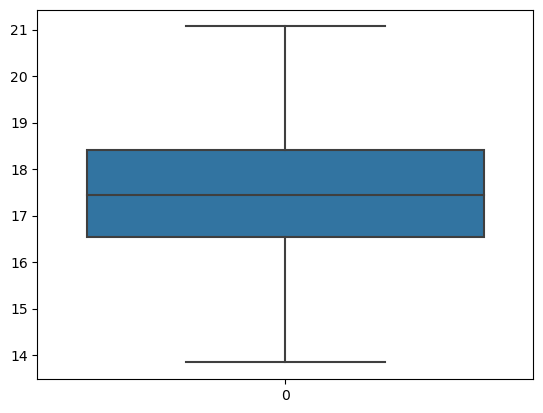

In [19]:
sns.boxplot(df["age"])
plt.show()

**From the above boxplot we observe that there are no outliers in the age column**

# 📌Data Preprocessing

In [20]:
names = df.columns[4:40]
scaled_feature = data.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [21]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [22]:
features = scaled_feature[names]

In [23]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,3,0,...,0,0,0,3,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [25]:
features = scaler.transform(features.values)

In [26]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


# 📌Convert object variable to numeric

In [27]:
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3

In [28]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    3
1    2
2    2
3    2
4    2
Name: gender, dtype: int64

# 📌Checkig the transformed values

In [29]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,2,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,2,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,2,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,2,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


# 📌Building the K-means model

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [31]:
model = kmeans.fit(scaled_feature)

# 📌Elbow Method*

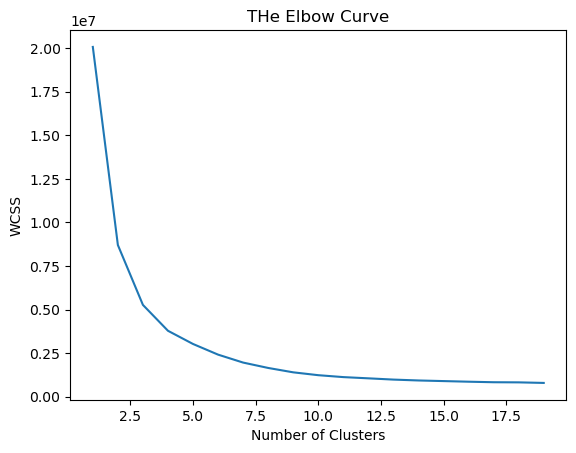

In [32]:
# Creating a function with KMeans to plot "The Elbow Curve"

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

**The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5.
We will use k=5 to further interpret our clustering result.**

# 📌Fit K-Means clustering for k=5

In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [34]:
kmeans.labels_

array([0, 2, 3, ..., 3, 3, 3])

In [35]:
len(kmeans.labels_)

15000

In [36]:
data['cluster'] = kmeans.labels_

# 📌Interpreting Clustering Results

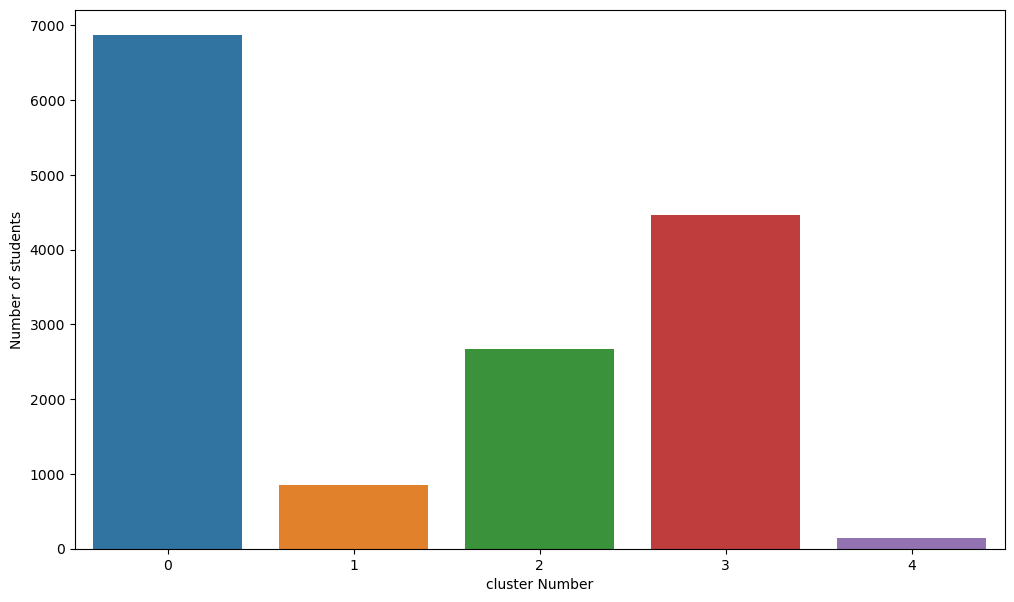

In [37]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

**From the above plot we can see that cluster 0 is the largest and cluster 2 has fewest teen students.**

# 📌Let' see the number of students belonging to each cluster

In [38]:
size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array

[6866, 850, 2668, 4469, 147]

## 📌Average Age in each cluster

In [39]:
# Calculate the mean age for each cluster
mean_age = data.groupby('cluster')['age'].mean()

# Print the mean age for each cluster in the desired format
for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")


Cluster 0: 18.03 years
Cluster 1: 17.80 years
Cluster 2: 17.76 years
Cluster 3: 18.06 years
Cluster 4: 17.68 years


In [40]:
data['gender'] = data['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})


In [41]:
data['gender'].value_counts()


0    11057
1     2606
3     1337
Name: gender, dtype: int64

## 📌Percentage of females in each cluster

In [42]:
# Calculate the percentage of females in each cluster
percentage_female = data[data['gender'] == 0].groupby('cluster').size() / data.groupby('cluster').size() * 100

# Print the percentage of females in each cluster in a readable format
for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")


Cluster 0: 70.36% females
Cluster 1: 80.12% females
Cluster 2: 77.51% females
Cluster 3: 74.94% females
Cluster 4: 87.07% females


## 📌Average number of friends in each cluster

In [43]:
# Calculate the average number of friends in each cluster
mean_friends = data.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")


Cluster 0: Average number of friends = 4.70
Cluster 1: Average number of friends = 109.86
Cluster 2: Average number of friends = 60.83
Cluster 3: Average number of friends = 28.85
Cluster 4: Average number of friends = 208.65


## 📌Cluster Analysis

In [44]:
cluster_analysis = pd.DataFrame({
    'Mean Age': mean_age,
    'Percentage Female': percentage_female,
    'Mean Number of Friends': mean_friends,
    'Number of Students': size_array  
})

print("Cluster Analysis:")
for cluster, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster}:")
    print(f"  Mean Age: {row['Mean Age']:.2f} years")
    print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
    print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
    print(f"  Number of Students: {row['Number of Students']}")
    print()  


Cluster Analysis:
Cluster 0:
  Mean Age: 18.03 years
  Percentage Female: 70.36%
  Mean Number of Friends: 4.70
  Number of Students: 6866.0

Cluster 1:
  Mean Age: 17.80 years
  Percentage Female: 80.12%
  Mean Number of Friends: 109.86
  Number of Students: 850.0

Cluster 2:
  Mean Age: 17.76 years
  Percentage Female: 77.51%
  Mean Number of Friends: 60.83
  Number of Students: 2668.0

Cluster 3:
  Mean Age: 18.06 years
  Percentage Female: 74.94%
  Mean Number of Friends: 28.85
  Number of Students: 4469.0

Cluster 4:
  Mean Age: 17.68 years
  Percentage Female: 87.07%
  Mean Number of Friends: 208.65
  Number of Students: 147.0



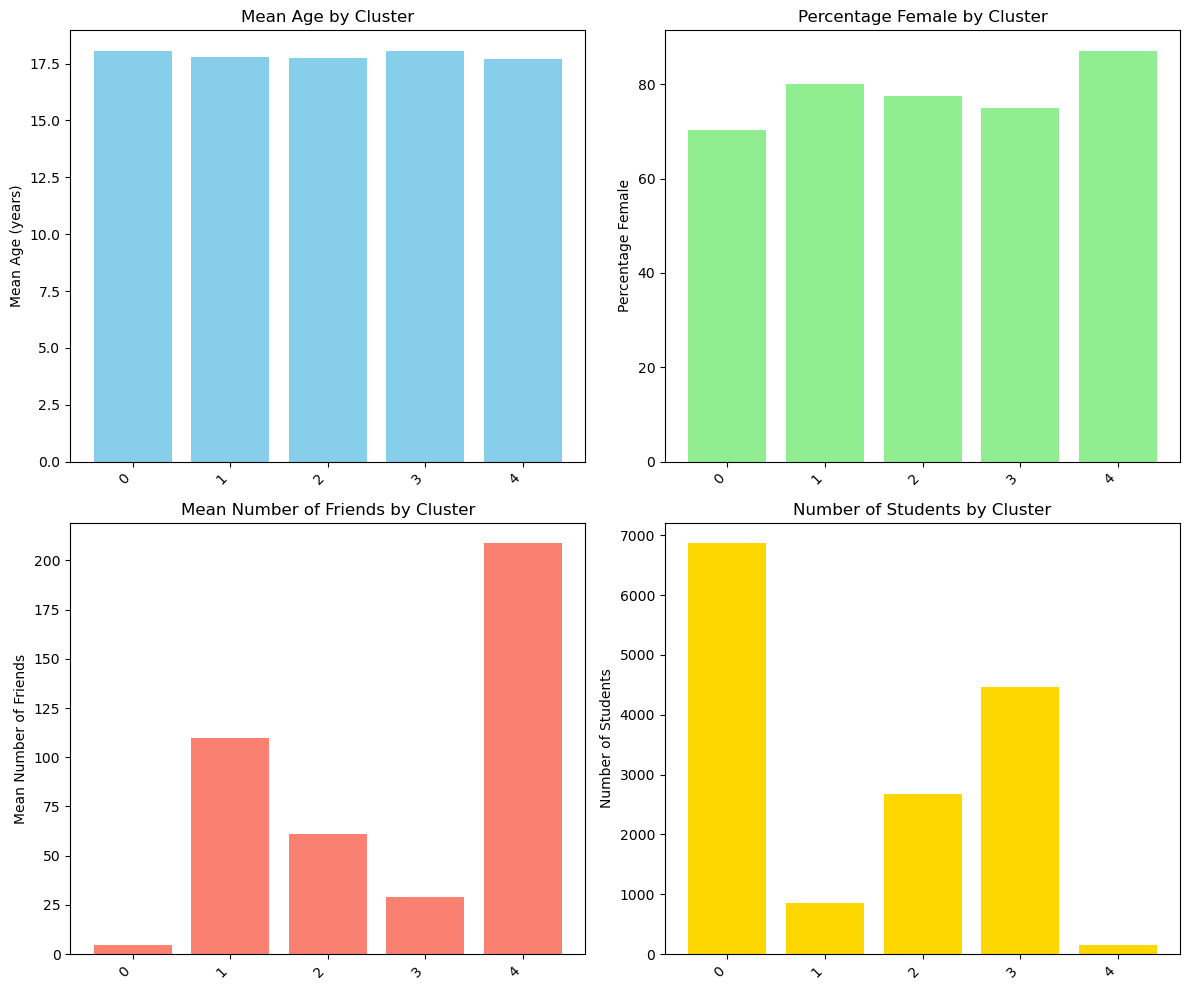

In [45]:

clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 📌Describe clusters characteristics

In [46]:
def describe_clusters(df):
   
    # Describe cluster characteristics
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    
    return cluster_df

describe_clusters(data)

Cluster Characteristics:


cluster,0,1,2,3,4
gradyear,2007.428634,2007.671765,2007.616942,2007.483777,2007.897959
gender,0.503787,0.387059,0.389055,0.392482,0.251701
age,18.033159,17.799872,17.756611,18.057834,17.678432
NumberOffriends,4.696038,109.861176,60.829085,28.849855,208.646259
basketball,0.213516,0.325882,0.337706,0.294249,0.312925
football,0.220798,0.310588,0.284858,0.279257,0.299320
soccer,0.187300,0.261176,0.264243,0.242336,0.231293
softball,0.117536,0.276471,0.231634,0.159544,0.149660
volleyball,0.099913,0.194118,0.193028,0.165585,0.258503
swimming,0.111419,0.137647,0.171289,0.146341,0.217687


 # 📌Recommendation for marketing department
 
#### 👉Targeting Female-Centric Products:

Clusters 1, 2, and 3 have a higher percentage of females compared to the overall population. Therefore, products or advertisements that specifically target teenage girls may perform well within these clusters.
Products related to fashion, beauty, socializing, or lifestyle may resonate more with these clusters.


#### 👉Understanding Male-Centric Interests:

Clusters 0 and 4 have a higher percentage of males. Understanding the interests and preferences of teenage boys within these clusters can help develop marketing campaigns tailored to their needs.
Products related to sports, technology, gaming, or adventure may appeal more to these clusters.

#### 👉Fashion and Retail Promotions:

Clusters 2 and 3 show a higher interest in shopping, suggesting that advertising campaigns or promotions related to shopping might be more effective for these clusters.


#### 👉Sports and Lifestyle Brand Partnerships:

Collaborate with sports brands or organize sports-related events and activities to appeal to clusters showing a strong interest in sports (e.g., Clusters 3 and 4).
